In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
sns.set()

attendance_df = pd.read_csv('../data/matches_transformed.csv', sep=',')

## Features - Target - Split
X = attendance_df.drop('attendance', axis=1)
y = attendance_df['attendance']

## Test - Train - Split

X_train, X_test, y_train, y_test, = train_test_split(
    X,
    y,
    train_size=2/3, random_state=123)

In [17]:
## Features standardisieren
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [18]:
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(estimator=LassoCV(cv=5, random_state=123)).fit(
    X_train_sc, y_train)
#mask = selector.get_support()

## Resultate anzeigen
## tbd: kontrollieren, ob dieser Data Frame wirklich gebraucht wird, oder nur anzeigen
##   dann allerdings auch gleich sortiert
print(pd.DataFrame({
    'Feature': X_train.columns,
    'coeff' : selector.estimator_.coef_,
    'mask' : selector.get_support()}). \
      sort_values(by=['coeff'], ascending = False))

## Redzuierte Data Frames erzeugen (train und test)
X_train_red = X_train.loc[:, selector.get_support()]
X_test_red = X_test.loc[:, selector.get_support()]

                             Feature        coeff   mask
20                 hometeam_FC Basel  5432.068777   True
18           hometeam_BSC Young Boys  2817.489500   True
26            hometeam_FC St. Gallen  1662.633106   True
25                  hometeam_FC Sion   963.389113   True
30                hometeam_FC Zürich   903.404820   True
23                hometeam_FC Luzern   751.922306   True
0                             season   691.577490   True
33          hometeam_Servette Genève   595.338908   True
37                 awayteam_FC Basel   590.943601   True
15                   weekday_Sonntag   251.615639   True
47                awayteam_FC Zürich   233.012158   True
2                        points_home   161.555796   True
50          awayteam_Servette Genève   159.910592   True
8                          form_home   120.328490   True
35           awayteam_BSC Young Boys    73.409585   True
13                    weekday_Montag    57.325915   True
52       matchday_cat_fourth_qu

In [19]:
## Features standardisieren
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_red)
X_train_red_sc = scaler.transform(X_train_red)
X_test_red_sc = scaler.transform(X_test_red)

In [20]:
## benötigte Klassen importieren
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import time

models = [
    LinearRegression(),
    Lasso(alpha=0.5011872336272735),
    Ridge(alpha=0.006579332246575682),
    KNeighborsRegressor(p = 1, n_neighbors=5),
    DecisionTreeRegressor(max_depth=4),
    RandomForestRegressor(n_estimators= 200, random_state = 123),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
    HistGradientBoostingRegressor(),
    # SVR(max_iter=1000),
    MLPRegressor(max_iter=1000, random_state=123)
]

In [21]:
## vorbereiten des Loops
regressors = []
scores = []
scores_red = []
used_times = []
used_times_red = []

## print output header
print('Regressor                        r2       time   r2 Reduced   time')
print('=========================================================================')

Regressor                        r2       time   r2 Reduced   time


In [22]:
for model in models:
    name = model.__class__.__name__
    regressors.append(name)

    #scaled
    start_time = time.time()
    model.fit(X_train_sc, y_train)
    score = model.score(X_test_sc, y_test)
    used_time = time.time() - start_time

    #red
    start_time = time.time()
    model.fit(X_train_red_sc, y_train)
    score_red = model.score(X_test_red_sc, y_test)
    used_time_red = time.time() - start_time


    scores.append(score)
    used_times.append(used_time)
    scores_red.append(score_red)
    used_times_red.append(used_time_red)

    print('%-30s   %0.4f   %0.4f   %0.4f   %0.4f ' %(name, score, used_time, score_red, used_time_red)) ## console output

LinearRegression                 0.8317   0.0235   0.8314   0.0202 
Lasso                            0.8317   0.0231   0.8314   0.0045 
Ridge                            0.8317   0.0057   0.8314   0.0016 
KNeighborsRegressor              0.8024   0.0892   0.7997   0.0748 
DecisionTreeRegressor            0.7631   0.0103   0.7635   0.0028 
RandomForestRegressor            0.8989   2.2487   0.9056   1.7123 
AdaBoostRegressor                0.7125   0.1722   0.6937   0.1421 
GradientBoostingRegressor        0.8877   0.2616   0.8840   0.1993 
HistGradientBoostingRegressor    0.8955   3.1603   0.8991   2.9723 
MLPRegressor                     0.8075   10.1579   0.8039   9.9699 


/Users/cyrillbader/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/cyrillbader/Library/Python/3.8/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


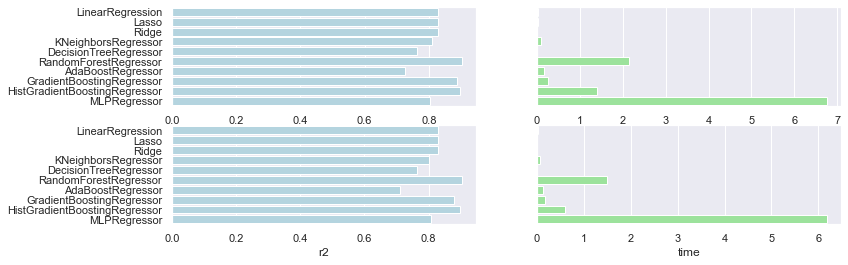

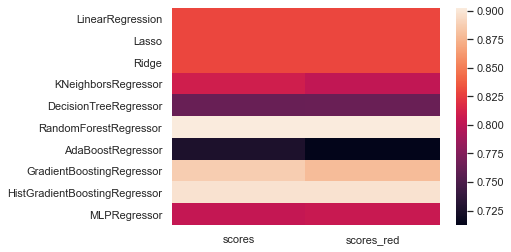

In [17]:
        ## Visualisieren der Resultate
f, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 4), sharex=False)
ax = sns.barplot(x=scores, y=regressors, color='lightblue', ax=axes[0,0])
ax.set_xlabel('r2')
ax = sns.barplot(x=used_times, y=regressors, color='lightgreen', ax=axes[0,1])
ax.set_yticklabels(['']* len(regressors))
ax.set_xlabel('time')
ax = sns.barplot(x=scores_red, y=regressors, color='lightblue', ax=axes[1,0])
ax.set_xlabel('r2')
ax = sns.barplot(x=used_times_red, y=regressors, color='lightgreen', ax=axes[1,1])
ax.set_yticklabels(['']* len(regressors))
ax.set_xlabel('time')
plt.show()

## Resultate visualisieren

scores_heatmap = pd.DataFrame(
    {'scores': scores,
     'scores_red': scores_red
    }, index=regressors)

sns.heatmap(scores_heatmap)
plt.show()